# **taller complexIntro Solución**\
Juan Diego Melo Suarez



## Exercise 1: Basic Complex Number Operations
1. Manually calculate and then verify using Python the result of `(3 + 4j) + (1 - 2j)`, `(5 + 6j) * (7 - 8j)`, and `(2 - 3j) / (1 + 4j)`.
2. Find the conjugate and modulus of `(3 - 4j)`.


In [ ]:
def intro1 ():
    num1=complex(3,4)
    num2=complex(1,-2)
    num3=complex(5,6)
    num4=complex(7,-8)
    num5=complex(2,-3)
    num6=complex(1,4)
    num7=complex(3,-4)

    print("suma= ",num1+num2)
    print("multiplicacion",num3*num4)
    print("division",num5/num6)
    print("conjudado " ,num7.conjugate())
    print("modulo",abs(num7))
intro1()

suma=  (4+2j)
multiplicacion (83+2j)
division (-0.5882352941176471-0.6470588235294118j)
conjudado  (3+4j)
modulo 5.0


## Exercise 2: Visualizing Complex Operations
1. Write a Python function to plot a complex number on the complex plane. Use it to plot `(3 + 4j)` and its conjugate.
2. Extend the function to show addition and multiplication of two complex numbers graphically.

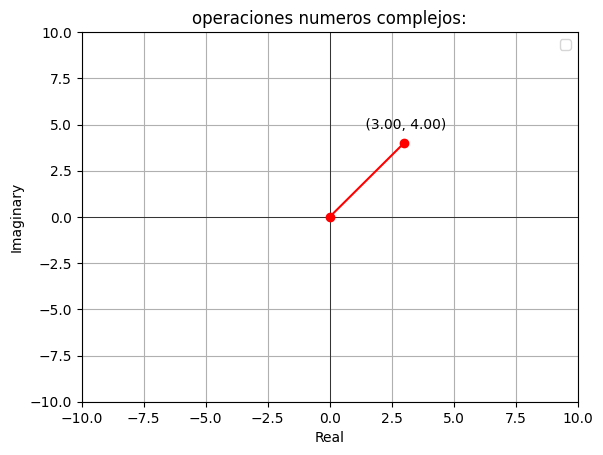

In [ ]:
import cmath
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def plot_complex_number(ax, z, label='', color='r'):
    ax.plot([0, z.real], [0, z.imag], color + 'o-', label=label)
    ax.annotate(f'{label} ({z.real:.2f}, {z.imag:.2f})', (z.real, z.imag), textcoords="offset points", xytext=(0,10), ha='center')

def convert_and_plot(real1, imaginary1, convert_to='polar'):
  #primero hay que definir el numero imaginario
    z1 = complex(real1, imaginary1)

#creacion de los ejes
    fig, ax = plt.subplots()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True)

#llamado a la funcion de arriba

    plot_complex_number(ax, z1, color='r')


  #nombre de los elementos del plano cartesiano
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    plt.title('operaciones numeros complejos:')
    ax.legend()
    plt.show()


convert_and_plot (3, 4, convert_to='polar')

**OPERACIONES MULTIPLICACION?** \

primero creamos el nuevo numero imaginario para poder hacer plot de dos numeros, luego definimos el condicional que nos permitira saber cual operacion quiere hacer el usuario
para el tipo de operacion y para los valores de los numeros se opto por la utilizacion de sliders como en el ejemplo proporcionado en el taller


In [ ]:
import cmath
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def plot_complex_number(ax, z, label='', color='r'):
    ax.plot([0, z.real], [0, z.imag], color + 'o-', label=label)
    ax.annotate(f'{label} ({z.real:.2f}, {z.imag:.2f})', (z.real, z.imag), textcoords="offset points", xytext=(0,10), ha='center')

def convert_and_plot(real1=0, imaginary1=0, real2=0, imaginary2=0, operation='none', convert_to='polar'):
  #primero hay que definir los numeros imaginarios
    z1 = complex(real1, imaginary1)
    z2 = complex(real2, imaginary2)

#a comparacion del codigo anterior se añade una verificacion de operacion, que inicialmente va a ser None; pero que con el dropdown se puede modificar
    if operation == 'addition':
        result = z1 + z2
        label = ''
    elif operation == 'multiplication':
        result = z1 * z2
        label = ''
    else:
        result = None
        label = ''
#creacion de los ejes
    fig, ax = plt.subplots()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True)

#llamado a la funcion de arriba

    plot_complex_number(ax, z1, color='r')
    plot_complex_number(ax, z2, color='b')

    if result is not None:
        plot_complex_number(ax, result, label=label, color='g')

  #nombre de los elementos del plano cartesiano
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    plt.title('operaciones numeros complejos: ')
    ax.legend()
    plt.show()


# definimos los sliders
style = {'description_width': 'initial'}
layout = widgets.Layout(width='400px')
real1_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='parte real #1 Z1:', style=style, layout=layout)
imaginary1_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Parte imaginaria #2 Z1:', style=style, layout=layout)
real2_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Parte real #2 Z2:', style=style, layout=layout)
imaginary2_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Parte imaginaria #2 Z2:', style=style, layout=layout)
operation_dropdown = widgets.Dropdown(options=['none', 'addition', 'multiplication'], value='none', description='Operation:', style=style, layout=layout)

# esta parte la deje igual a la proporcionada por el documento

ui = widgets.VBox([widgets.HBox([real1_slider, imaginary1_slider]),
                   widgets.HBox([real2_slider, imaginary2_slider]),
                   operation_dropdown])

out = widgets.interactive_output(convert_and_plot, {'real1': real1_slider, 'imaginary1': imaginary1_slider,
                                                    'real2': real2_slider, 'imaginary2': imaginary2_slider,
                                                    'operation': operation_dropdown})

display(ui, out)


Output()

## Exercise 3: Exploring the Mandelbrot Set
1. Modify the provided Mandelbrot set code to change its zoom level and center point. Observe how the fractal pattern changes.
2. Experiment with different values of `max_iter` and observe the effect on the fractal's detail and computation time.



aqui encerramos todo lo que hay abajo de mandelbrot y lo anidamos en una nueva funcion donde ponemos a zoom y a center como parametros de la funcion.

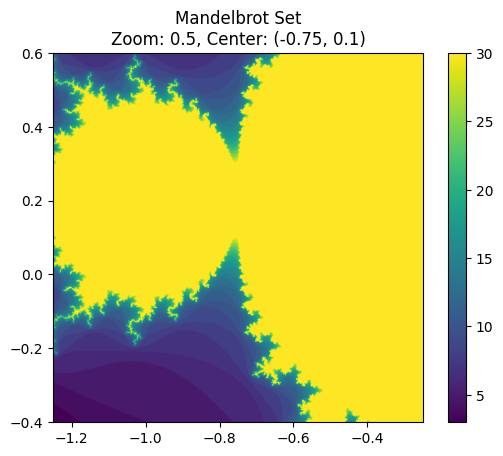

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Función para ajustar zoom y centro
def zoom_center(zoom, center_x, center_y):
    pixels = 800
    max_iter = 30

    # Definir los rangos centrados alrededor de (center_x, center_y)
    x = np.linspace(center_x - zoom, center_x + zoom, pixels)
    y = np.linspace(center_y - zoom, center_y + zoom, pixels)
    xx, yy = np.meshgrid(x, y)
    c = xx + yy*1j

    # Calcular el conjunto de Mandelbrot
    mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

    # Graficar
    plt.imshow(mandelbrot_set, extent=[center_x - zoom, center_x + zoom, center_y - zoom, center_y + zoom])
    plt.colorbar()
    plt.title(f"Mandelbrot Set\nZoom: {zoom}, Center: ({center_x}, {center_y})")
    plt.show()

zoom = 0.5
center_x = -0.75
center_y = 0.1
zoom_center(zoom, center_x, center_y)


**CAMBIANDO MAX ITER**
prueba con 100


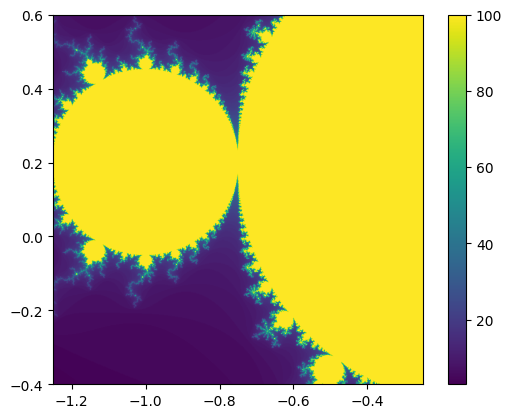

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Función para ajustar zoom y centro
def zoom_center(zoom, center_x, center_y):
    pixels = 800
    max_iter = 100
    # Definir los rangos centrados alrededor de (center_x, center_y)
    x = np.linspace(center_x - zoom, center_x + zoom, pixels)
    y = np.linspace(center_y - zoom, center_y + zoom, pixels)
    xx, yy = np.meshgrid(x, y)
    c = xx + yy*1j

    # Calcular el conjunto de Mandelbrot
    mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

    # Graficar
    plt.imshow(mandelbrot_set, extent=[center_x - zoom, center_x + zoom, center_y - zoom, center_y + zoom])
    plt.colorbar()
    plt.show()

zoom = 0.5
center_x = -0.75
center_y = 0.1
zoom_center(zoom, center_x, center_y)


## Exercise 4: Creating a Julia Set
1. Implement a Julia set generator. Use a constant like `-0.4 + 0.6j` for the iteration `z = z*z + constant`.
2. Explore how changing the constant changes the pattern of the Julia set.

# Caso 1


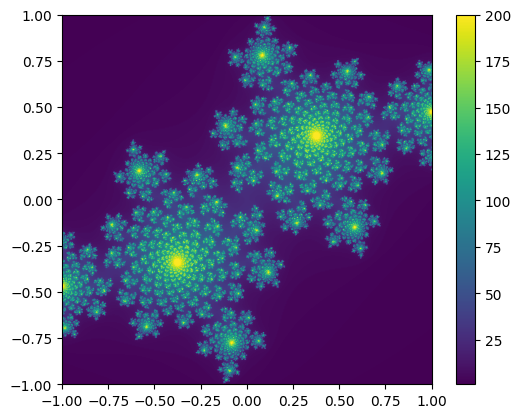

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def julia(c, constant, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + constant
    return max_iter

# Función para generar el conjunto de Julia
def julia_set(constant, zoom=1, center_x=0, center_y=0, pixels=800, max_iter=200):
    # Definir los rangos centrados alrededor de (center_x, center_y)
    x = np.linspace(center_x - zoom, center_x + zoom, pixels)
    y = np.linspace(center_y - zoom, center_y + zoom, pixels)
    xx, yy = np.meshgrid(x, y)
    c = xx + yy*1j

    # Calcular el conjunto de Julia
    julia_set = np.array([julia(ci, constant, max_iter) for ci in c.ravel()]).reshape(c.shape)

    # Graficar
    plt.imshow(julia_set, extent=[center_x - zoom, center_x + zoom, center_y - zoom, center_y + zoom])
    plt.colorbar()
    plt.show()

# Constante para el conjunto de Julia
constant = -0.4 + 0.6j

# Ajustar zoom y centro si es necesario
zoom = 1
center_x = 0
center_y = 0

# Llamar a la función para generar y mostrar el conjunto de Julia
julia_set(constant, zoom, center_x, center_y)


# caso 2

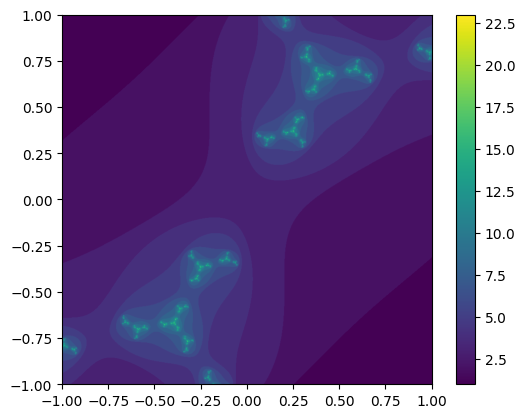

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def julia(c, constant, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + constant
    return max_iter

# Función para generar el conjunto de Julia
def julia_set(constant, zoom=1, center_x=0, center_y=0, pixels=800, max_iter=200):
    # Definir los rangos centrados alrededor de (center_x, center_y)
    x = np.linspace(center_x - zoom, center_x + zoom, pixels)
    y = np.linspace(center_y - zoom, center_y + zoom, pixels)
    xx, yy = np.meshgrid(x, y)
    c = xx + yy*1j

    # Calcular el conjunto de Julia
    julia_set = np.array([julia(ci, constant, max_iter) for ci in c.ravel()]).reshape(c.shape)

    # Graficar
    plt.imshow(julia_set, extent=[center_x - zoom, center_x + zoom, center_y - zoom, center_y + zoom])
    plt.colorbar()
    plt.show()

# Constante para el conjunto de Julia
constant = -0.1 + 1.2j

# Ajustar zoom y centro si es necesario
zoom = 1
center_x = 0
center_y = 0

# Llamar a la función para generar y mostrar el conjunto de Julia
julia_set(constant, zoom, center_x, center_y)


## Exercise 5: Complex Number Properties
1. Prove that the absolute value of a product of two complex numbers is the product of their absolute values.
2. Show that the conjugate of a sum of two complex numbers is the sum of their conjugates.

In [33]:
def prueba(z1,z2):
  result=abs(z1*z2)
  result2=abs(z1)*abs(z2)
  print(result)
  print(result2)
num=complex(3,4)
num2=complex(1,-2)
prueba(num,num2)

11.180339887498949
11.180339887498949


In [37]:
def prueba(z1,z2):
  result=(z1+z2).conjugate()
  result2= z1.conjugate()+z2.conjugate()
  print(result)
  print(result2)
num=complex(3,4)
num2=complex(1,-2)
prueba(num,num2)

(4-2j)
(4-2j)
